 # Project: Dog Breed Classification




<img src="1.jpg">

# Objective:

Given a set of different dog breed images, build an image classifier to determine the breed of a dog in the image.

# Context:

Image Classification problem, which is the task of assigning an input image one label from a fixed set of categories. This is one of the core problems in Computer Vision that, despite its simplicity, has a large variety of practical applications. Moreover, as we will see later in the course, many other seemingly distinct Computer Vision tasks (such as object detection, segmentation) can be reduced to image classification.

In this project we will use traditional CNN, CNN with data augmentation and finally transfer Learning by VGG16 model with weights pre-trained on Imagenet to solve the dog breed classification problem

# Convolutional neural network

In deep learning, a convolutional neural network is a class of deep neural networks, most commonly applied to analyzing visual imagery. They are also known as shift invariant or space invariant artificial neural networks, based on their shared-weights architecture and translation invariance characteristics.

A convolutional neural network (CNN) is a specific type of artificial neural network that uses perceptrons, a machine learning unit algorithm, for supervised learning, to analyze data. CNNs apply to image processing, natural language processing and other kinds of cognitive tasks

<img src="cnn.jpeg">

# Steps 
    
 Setup Environment and Load Necessary Packages 

 Data Preparation (

o Loading Data 

o Cleaning Data 

o Data Representation & Feature Engineering (If Any) 

o Creating Train and Validation Set 

 Model Creation 

o Write & Configure Model 

o Compile Model 

o Build Model & Checking Summary 


Training and Evaluation 

o Run Multiple Experiments 

o Reason & Visualize Model Performance

o Evaluate Model on Test Set 

### Image classification is a supervised learning problem: define a set of target classes (objects to identify in images), and train a model to recognize them using labeled example photos. Early computer vision models relied on raw pixel data as the input to the model.

# Setup Environment and Load Necessary Packages 

In [0]:
import pandas as pd
from tqdm import tqdm
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dense, Dropout
from keras import backend as K
import vis
from keras.models import Model

Using TensorFlow backend.


# Data Preparation 

### Load Dataset Files

In [0]:
from google.colab import drive

In [4]:
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


Now, upload the given dataset file shared with you in your google drive and give its path for the below given project_path variable. For example, a path is given below according to the file path in our google drive. You need to change this to match the path of yours.

In [0]:
project_path = "/content/gdrive/My Drive/AIML/R8/DogBreed/"


Run the below code to extract all the images in the train.zip files given in the dataset. We are going to use these images as train and validation sets and their labels in further steps.

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'dog-breed-identification.zip', 'r') as z:
  z.extractall()

In [7]:
ls -l

total 26368
drwx------ 4 root root     4096 Dec 17 04:41 gdrive/
-rw-r--r-- 1 root root   482063 Dec 17 04:41 labels.csv
drwxr-xr-x 1 root root     4096 Dec 12 16:48 sample_data/
-rw-r--r-- 1 root root 25200295 Dec 17 04:41 sample_submission.csv
drwxr-xr-x 2 root root   651264 Dec 17 04:42 test/
drwxr-xr-x 2 root root   655360 Dec 17 04:42 train/



After this process, we will have 4 files - Train folder, test folder and labels.csv and sample_submission.csv as part of your google drive

### Read labels.csv file using pandas


In [0]:
labels_df = pd.read_csv('labels.csv')

### Print the count of each category of Dogs given in the dataset


In [9]:
labels_df.groupby(by='breed').count()


,id
breed,
affenpinscher,80
afghan_hound,116
african_hunting_dog,86
airedale,107
american_staffordshire_terrier,74
...,...
welsh_springer_spaniel,79
west_highland_white_terrier,81
whippet,95


In [10]:
labels_df.isnull()

,id,breed
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
10217,False,False
10218,False,False
10219,False,False
10220,False,False


There is no need for cleaning the data as there are no missing values.

### Data Representation & Feature Engineering 

# Get one-hot encodings of labels

One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction.One-hot encoding converts it into n variables, while dummy encoding converts it into n-1 variables. If we have k categorical variables, each of which has n values. One hot encoding ends up with kn variables, while dummy encoding ends up with kn-k variables.


In [11]:
labels_df.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [0]:
labels_en_df = pd.get_dummies(labels_df.breed)


In [13]:
labels_en_df.head(10)


,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,beagle,bedlington_terrier,bernese_mountain_dog,black-and-tan_coonhound,blenheim_spaniel,bloodhound,bluetick,border_collie,border_terrier,borzoi,boston_bull,bouvier_des_flandres,boxer,brabancon_griffon,briard,brittany_spaniel,bull_mastiff,cairn,cardigan,chesapeake_bay_retriever,chihuahua,chow,clumber,cocker_spaniel,collie,curly-coated_retriever,dandie_dinmont,dhole,dingo,doberman,english_foxhound,...,norwegian_elkhound,norwich_terrier,old_english_sheepdog,otterhound,papillon,pekinese,pembroke,pomeranian,pug,redbone,rhodesian_ridgeback,rottweiler,saint_bernard,saluki,samoyed,schipperke,scotch_terrier,scottish_deerhound,sealyham_terrier,shetland_sheepdog,shih-tzu,siberian_husky,silky_terrier,soft-coated_wheaten_terrier,staffordshire_bullterrier,standard_poodle,standard_schnauzer,sussex_spaniel,tibetan_mastiff,tibetan_terrier,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Preparing training dataset


In [0]:
img_rows = 128
img_cols = 128

In [0]:
x_train = []
y_train = []

In [16]:

for f, img in tqdm(labels_df.values):
  train_img = cv2.imread('./train/{}.jpg'.format(f),1)
  train_img_resize = cv2.resize(train_img,(img_rows,img_cols))
  x_train.append(train_img_resize)
  y_train.append(img)

100%|██████████| 10222/10222 [00:32<00:00, 318.68it/s]


In [17]:

y_train[20]

'doberman'

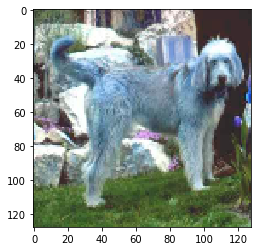

In [18]:
plt.imshow(x_train[21])

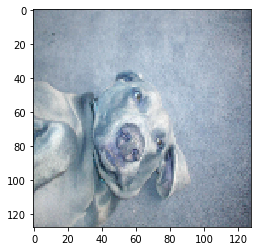

In [19]:
plt.imshow(x_train[35])

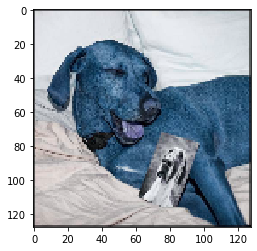

In [20]:
plt.imshow(x_train[100])

Normalize the training data and convert into 4 dimensions so that it can be used as an input to conv layers in the model



In [0]:
x_train_conv = np.array(x_train)


In [22]:
x_train_conv.shape


(10222, 128, 128, 3)

In [0]:
x_train_conv =  x_train_conv.astype("float32") / 255


In [0]:
y_train_class = pd.get_dummies(y_train)


In [25]:
y_train_class.shape


(10222, 120)

### Split the training and validation data from x_train_conv and y_train_class obtained from above step

In [0]:
### Split the Dataset
X_train, X_val, y_train, y_val = train_test_split(x_train_conv, y_train_class, test_size=0.3, random_state=7)

### Loading the test data


Read the id column from the samples_submission.csv and store it in test_img



In [0]:
test_img_df = pd.read_csv('sample_submission.csv',usecols=[0])


In [28]:
test_img_df.head()


,id
0,000621fb3cbb32d8935728e48679680e
1,00102ee9d8eb90812350685311fe5890
2,0012a730dfa437f5f3613fb75efcd4ce
3,001510bc8570bbeee98c8d80c8a95ec1
4,001a5f3114548acdefa3d4da05474c2e


Run the below code to load the test image files in x_test_feature



In [29]:
x_test_feature = []
i = 0 # initialisation
for f in tqdm(test_img_df.id): # f for format ,jpg
    img = cv2.imread('./test/{}.jpg'.format(f), 1)
    img_resize = cv2.resize(img, (img_rows, img_cols)) 
    x_test_feature.append(img_resize)

100%|██████████| 10357/10357 [00:31<00:00, 333.22it/s]


Normalize the test data and convert it into 4 dimensions



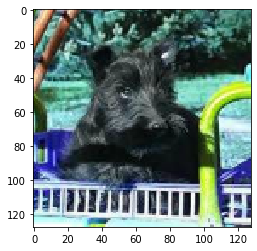

In [30]:
plt.imshow(x_test_feature[20])


In [0]:
x_test_conv = np.array(x_test_feature)


In [32]:
x_test_conv.shape


(10357, 128, 128, 3)

## Model Creation

# Relu Activation Function

ReLU stands for rectified linear unit, and is a type of activation function. Mathematically, it is defined as y = max(0, x). .ReLU is the most commonly used activation function in neural networks, especially in CNNs. If you are unsure what activation function to use in your network, ReLU is usually a good first choice.

<img src="r.png">

In [33]:
model_conv = Sequential()
model_conv.add(Conv2D(32, (5, 3), activation='relu', input_shape=(128, 128, 3)))
model_conv.add(MaxPooling2D(pool_size=(3, 3)))
model_conv.add(Conv2D(32, (3, 3), activation='relu'))
model_conv.add(MaxPooling2D(pool_size=(3, 3)))

In [0]:
model_conv.add(Flatten())
model_conv.add(Dense(256, activation='relu'))
model_conv.add(Dense(120, activation='softmax'))

In [35]:
model_conv.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 124, 126, 32)      1472      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 41, 42, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 39, 40, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               1384704   
_________________________________________________________________
dense_2 (Dense)              (None, 120)              

### Execute the model


# Stochastic gradient descent (SGD) 

Role of an optimizer
Optimizers update the weight parameters to minimize the loss function. Loss function acts as guides to the terrain telling optimizer if it is moving in the right direction to reach the bottom of the valley, the global minimum.

Stochastic gradient descent (often abbreviated SGD) is an iterative method for optimizing an objective function with suitable smoothness properties (e.g. differentiable or subdifferentiable).

In [36]:
model_conv.compile(loss='categorical_crossentropy', optimizer="sgd", metrics=['accuracy'])


In [37]:
%%time 
output_conv = model_conv.fit(X_train, y_train, batch_size=128, epochs=10, verbose=2,
                    validation_data=(X_val, y_val))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 7155 samples, validate on 3067 samples
Epoch 1/10





 - 103s - loss: 4.7975 - acc: 0.0078 - val_loss: 4.7870 - val_acc: 0.0095
Epoch 2/10
 - 102s - loss: 4.7845 - acc: 0.0105 - val_loss: 4.7837 - val_acc: 0.0117
Epoch 3/10
 - 101s - loss: 4.7794 - acc: 0.0112 - val_loss: 4.7819 - val_acc: 0.0130
Epoch 4/10
 - 101s - loss: 4.7756 - acc: 0.0115 - val_loss: 4.7805 - val_acc: 0.0137
Epoch 5/10
 - 102s - loss: 4.7712 - acc: 0.0129 - val_loss: 4.7785 - val_acc: 0.0147
Epoch 6/10
 - 102s - loss: 4.7664 - acc: 0.0130 - val_loss: 4.7769 - val_acc: 0.0143
Epoch 7/10
 - 102s - loss: 4.7611 - acc: 0.0140 - val_loss: 4.7729 - val_acc: 0.0166
Epoch 8/10
 - 102s - loss: 4.7540 - acc: 0.0169 - val_loss: 4.7695 - val_acc: 0.0186
Epoch 9/10
 - 102s - loss: 4.7458 - acc: 0.0201 - val_loss: 4.7636 - val_acc: 0.0170
Epoch 10/10
 - 102s - loss: 4.7352 - acc: 0.0212 - val_loss: 4.7547 - val_acc: 0.0196

### The model accuracy is very poor.


## Training and Evaluation

# Use Data Augmentation in the above model to see if the accuracy improves

Image data augmentation is a technique that can be used to artificially expand the size of a training dataset by creating modified versions of images in the dataset.you will discover how to use image data augmentation when training deep learning neural networks.


# ImageDataGenerator 

ImageDataGenerator generates batches of image data with real-time data augmentation. The most basic codes to create and configure ImageDataGenerator and train deep neural network with augmented images are as follows. We can experiment with the following code to create augmented images with the desired properties

Keras is a great high-level library which allows anyone to create powerful machine learning models in minutes. Keras has this ImageDataGenerator class which allows the users to perform image augmentation on the fly in a very easy way. You can read about that in Keras's official documentation

### Run Multiple Experiments

In [0]:
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array


In [0]:

data = ImageDataGenerator(validation_split=0.2, 
                          rescale=1/255,
                          samplewise_center=True, # set input mean to 0 over the sample
                          samplewise_std_normalization=True,  # divide inputs by std of the sample
                          rotation_range=90,       # randomly rotate images in the range (degrees, 0 to 180)
                          width_shift_range=0.2,   # randomly shift images horizontally (fraction of total width)
                          height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
                          fill_mode='reflect',     # filling the area outside
                          zoom_range=0.4,          # random zoom
                          horizontal_flip=True,    # randomly flip images
                          vertical_flip=True)      # randomly flip images

Using the above objects, create the image generators with variable names train_generator and val_generator

You need to use train_datagen.flow() and val_datagen.flow()



In [0]:
train_generator = data.flow(X_train, y_train, batch_size=128)


In [0]:
val_generator = data.flow(X_val,y_val,batch_size = 128)


### Fit the model using fit_generator() using train_generator and val_generator from the above step with 10 epochs

In [42]:
output_imggen = model_conv.fit_generator(train_generator, epochs=10, validation_data=val_generator, verbose = 2, steps_per_epoch=20, validation_steps=80)


Epoch 1/10
 - 119s - loss: 4.8058 - acc: 0.0126 - val_loss: 4.7913 - val_acc: 0.0129
Epoch 2/10
 - 115s - loss: 4.7661 - acc: 0.0098 - val_loss: 4.7764 - val_acc: 0.0122
Epoch 3/10
 - 115s - loss: 4.7584 - acc: 0.0137 - val_loss: 4.7745 - val_acc: 0.0117
Epoch 4/10
 - 115s - loss: 4.7554 - acc: 0.0152 - val_loss: 4.7720 - val_acc: 0.0134
Epoch 5/10
 - 115s - loss: 4.7580 - acc: 0.0149 - val_loss: 4.7654 - val_acc: 0.0138
Epoch 6/10
 - 115s - loss: 4.7450 - acc: 0.0172 - val_loss: 4.7670 - val_acc: 0.0141
Epoch 7/10
 - 116s - loss: 4.7414 - acc: 0.0153 - val_loss: 4.7639 - val_acc: 0.0128
Epoch 8/10
 - 117s - loss: 4.7534 - acc: 0.0129 - val_loss: 4.7545 - val_acc: 0.0127
Epoch 9/10
 - 119s - loss: 4.7300 - acc: 0.0129 - val_loss: 4.7506 - val_acc: 0.0149
Epoch 10/10
 - 118s - loss: 4.7336 - acc: 0.0176 - val_loss: 4.7507 - val_acc: 0.0153


#### Model accuracy is still poor

# Lets use Transfer Learning for better accuracy

Transfer learning is a research problem in machine learning that focuses on storing knowledge gained while solving one problem and applying it to a different but related problem. For example, knowledge gained while learning to recognize cars could apply when trying to recognize trucks.

Transfer learning is a machine learning method where a model developed for a task is reused as the starting point for a model on a second task.Common examples of transfer learning in deep learning

<img src="4.png">

Download the vgg wieght file from here : https://github.com/MinerKasch/applied_deep_learning/blob/master/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5

In [0]:
# Use the below code to load VGG16 weights trained on ImageNet
from keras.applications.vgg16 import VGG16, preprocess_input
# Instantiate the model with the pre-trained weights (no top)

base_model= VGG16(weights=('./gdrive/My Drive/AIML/R8/DogBreed/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'),
                 include_top=False, pooling='avg')


Print the summary of the base_model



In [44]:
base_model.summary()


Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     


Add the following classification layers to the imported VGG Model
Flatten Layer

1.   Dense layer with 1024 neurons with activation as Relu

1.   Dense layer with 256 neurons with activation as Relu
2.   Dense layer with 120 neurons with activation as Softmax

In [45]:
x = base_model.output
x = Dense(1024, activation='relu')(x) # let's add a fully-connected layer
x = Dropout(0.25)(x)
x = Dense(256, activation='relu')(x) # let's add a fully-connected layer
x = Dropout(0.25)(x)
predictions = Dense(120, activation='softmax')(x)

# this is the model we will train
m = Model(inputs=base_model.input, outputs=predictions)


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


### Make all the layers in the base_model (VGG16) to be non-trainable



VGG16 (also called OxfordNet) is a convolutional neural network architecture named after the Visual Geometry Group from Oxford, who developed it. It was used to win the ILSVR (ImageNet) competition in 2014.

<img src="3.jpg">

It usually refers to a deep convolutional network for object recognition developed and trained by Oxford's renowned Visual Geometry Group (VGG), which achieved very good performance on the ImageNet dataset.

In [0]:
for layer in m.layers:
    m.trainable = False

# Fit and compile the model with batch_size = 128 and epochs = 10 and execute the model.Try to get training and validation accuracy to be more than 90%

In [0]:
m.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])


In [48]:
m_output =  m.fit_generator(train_generator, epochs=5, steps_per_epoch=1000 // 8,
                            validation_data=val_generator, validation_steps=128,
                            verbose = 1)

Epoch 1/5
125/125 [==============================] - 5409s 43s/step - loss: 0.0492 - acc: 0.9917 - val_loss: 0.0487 - val_acc: 0.9917
Epoch 2/5
125/125 [==============================] - 5384s 43s/step - loss: 0.0491 - acc: 0.9917 - val_loss: 0.0487 - val_acc: 0.9917
Epoch 3/5
125/125 [==============================] - 5340s 43s/step - loss: 0.0491 - acc: 0.9917 - val_loss: 0.0487 - val_acc: 0.9917
Epoch 4/5
125/125 [==============================] - 5364s 43s/step - loss: 0.0491 - acc: 0.9917 - val_loss: 0.0487 - val_acc: 0.9917
Epoch 5/5
125/125 [==============================] - 5334s 43s/step - loss: 0.0492 - acc: 0.9917 - val_loss: 0.0487 - val_acc: 0.9917


# Accuracy is 99.17%

<img src="2.jpg">